# <p style="text-align:center;"> <u>STROKE RISK PREDICTION</u> </p>

### AIM: OUR AIM IS TO PREDICT WHETHER A PERSON HAD A STROKE OR NOT BASED ON THE FOLLOWING FEATURES:

* id: unique identifier
* gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

-----------

# <p style="text-align:center;"> <u>STEPS ONE SHOULD FOLLOW WHILE WORKING ON ML DATASET</u></p>


* <span style="font-size:20px;"> In this kernel, I have worked on the Exploratory Data Analysis or EDA of the stroke risk dataset. Exploratory Data Analysis or EDA is a first step in analysing a new dataset. The primary objective of EDA is to analyse the data for distribution, outliers and anomalies in the dataset. It includes analysing the data to find the distribution of data, its main characteristics, identifying patterns and visualizations. It also provides tools for hypothesis generation by visualizing and understanding the data through graphical representation.</span>

* <span style="font-size:20px;">Feature Engineering is the Second Step one should follow while doing any Machine Learning Project. In this step we perform the following things:
          
          Handle the Missing Values if any.
          Handling the Outliers.
          Handling the Categorical Data.
          Normalizing the Data for further Model building.
    
    
* <span style="font-size:20px;">The third Step is Feature Selection. In this step we use some techniques to identify the important and unnecessary features to feed to our model.</span>
    
* <span style="font-size:20px;">The Final step I performed is Building Machine Learning Models: Random Forest, XGBOOST </span>

* <span style="font-size:20px;">If the Accuracy is NOT SATISFYING, then we perform Hyper-Parameter Tuning to enhance the performance of our Model</span>



------

------

## IMPORT REQUIRED LIBRARIES:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [2]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
#GET THE FIRST 5 ROWS:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
#GET THE LIST OF COLUMNS IN DATASET:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
#GET THE STATISTICS OF DATA:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


* HERE WE CAN SEE THAT THE COUNT OF "BMI" IS LESS COMPARED TO OTHER FEATURES. THAT MEANS BMI HAS SOME NULL VALUES.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* HERE THE CATEGORICAL FEATURES ARE - "GENDER", "EVER_MARRIED", "WORK_TYPE", "RESIDENCE_TYPE", "SMOKING_STATUS".
* WE NEED TO HANDLE THESE COLUMNS. (CONVERT TO NUMERIC DATA)

-----

## EDA & FEATURE ENGINEERING

-----------

## EDA

* <span style="font-size:20px;">Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. (source: Wikipedia)</span>

* <span style="font-size:20px;">In summary, EDA can show us hidden relationships and attributes present in our data even before we throw it at a machine learning model.</span>

## FEATURE ENGINEERING
    
*  <span style="font-size:20px;">Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning and is both difficult and expensive. (source: Wikipedia)</span>
    
*  <span style="font-size:20px;">In summary, FE is simply using your existing knowledge of the dataset to create new features that can help a machine learning model perform better.</span>

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


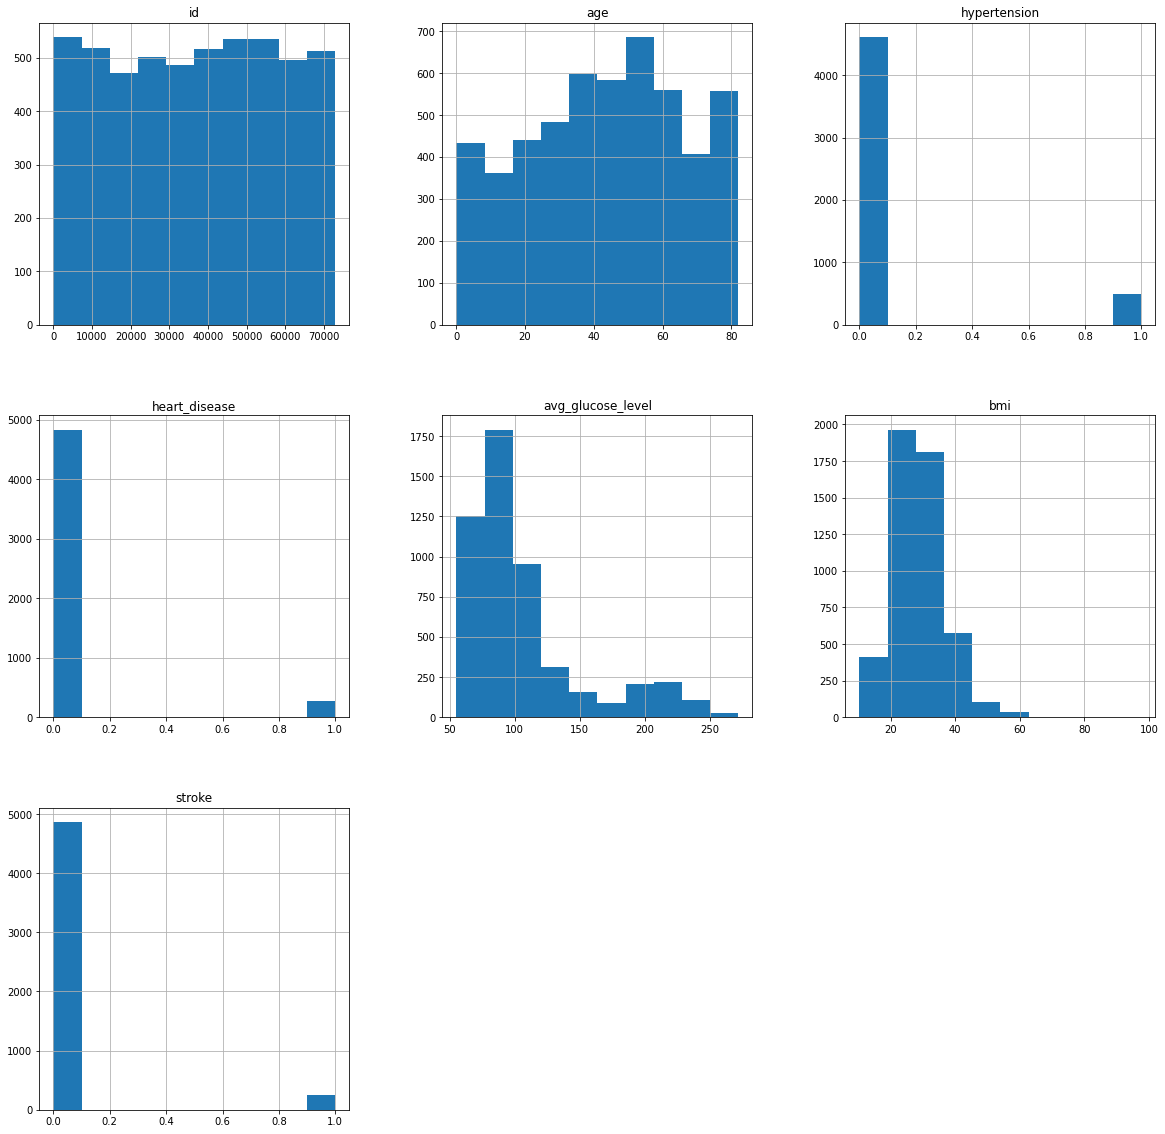

In [7]:
# Plot histograms of each parameter 

df.hist(figsize = (20, 20))
plt.show()

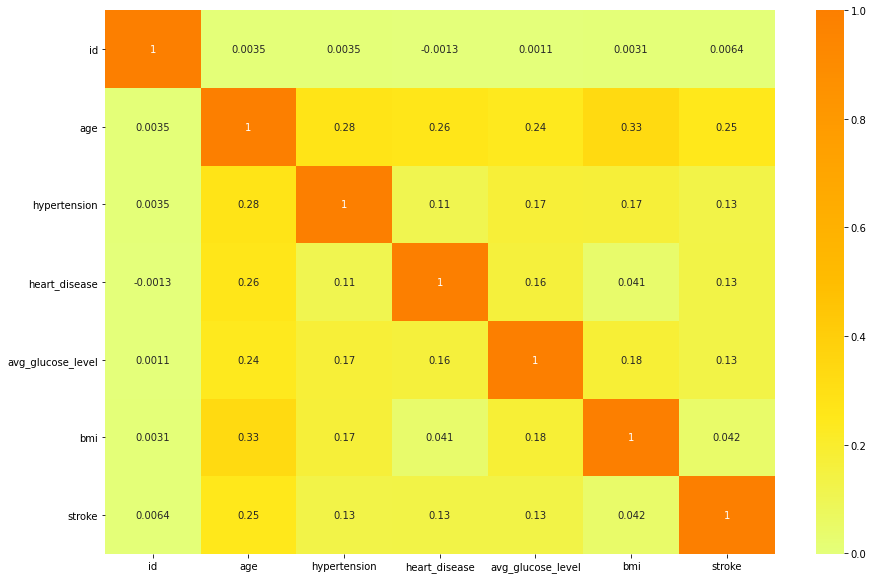

In [8]:
#visualize the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap = 'Wistia')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


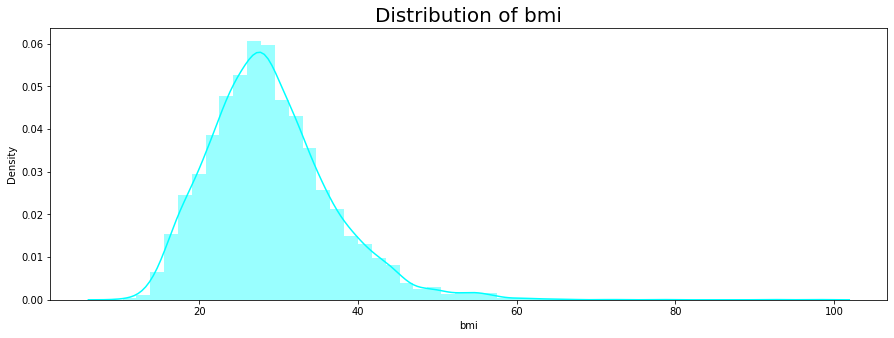

In [9]:
plt.subplots(figsize=(15,5))
sns.distplot(df['bmi'], color = 'cyan')
plt.title('Distribution of bmi', fontsize = 20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


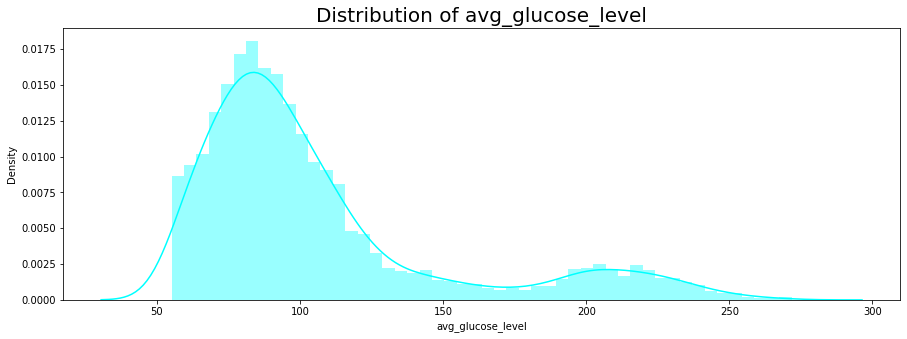

In [10]:
plt.subplots(figsize=(15,5))
sns.distplot(df['avg_glucose_level'], color = 'cyan')
plt.title('Distribution of avg_glucose_level', fontsize = 20)
plt.show()

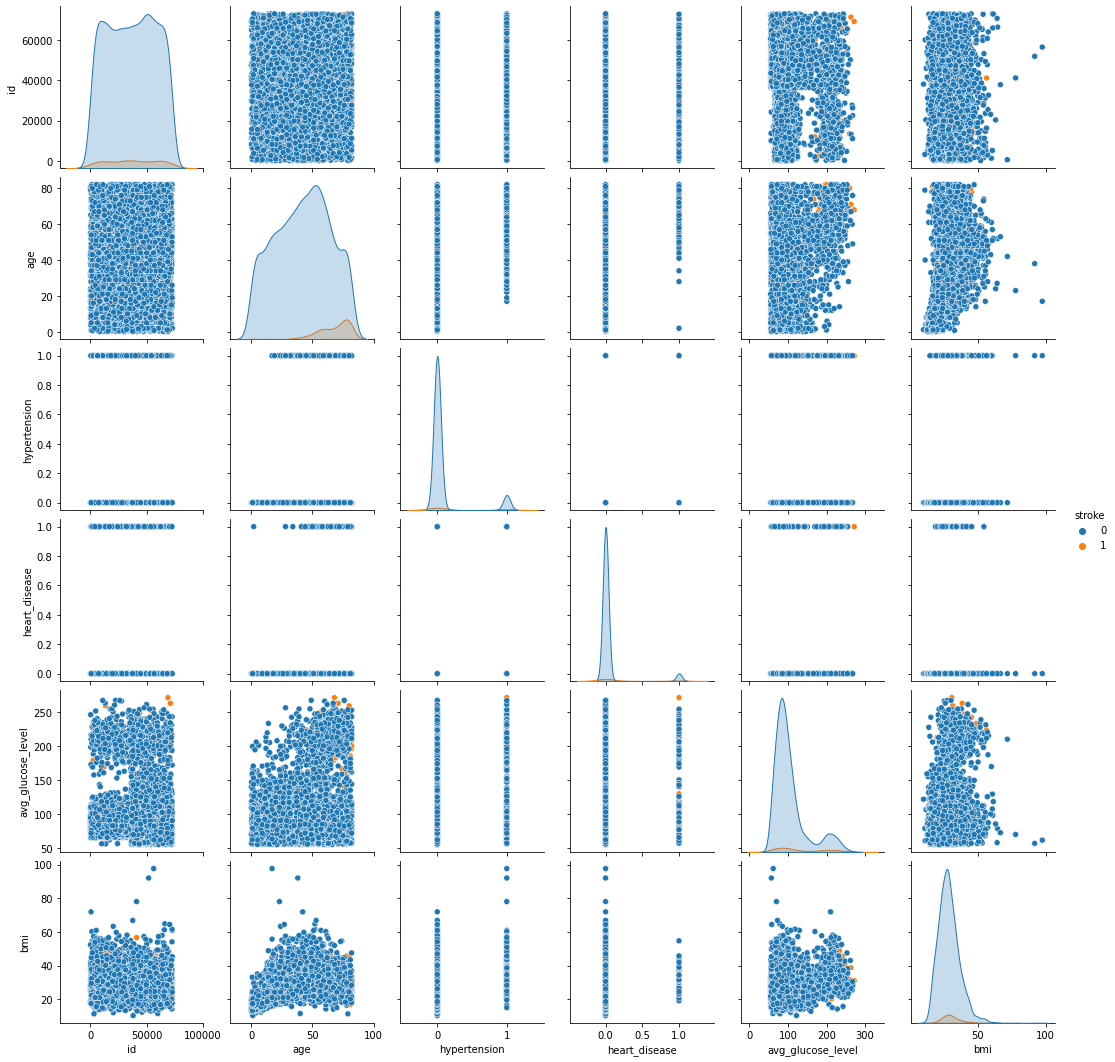

In [11]:
sns.pairplot(df, hue='stroke')

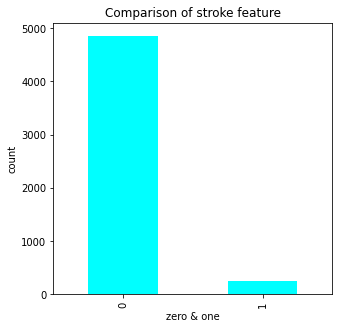

In [12]:
df['stroke'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of stroke feature')
plt.xlabel('zero & one')
plt.ylabel('count')
plt.show()

* HERE WE CAN SEE THE DATA IS COMPLETELY IMBALANCE. WE'LL HANDLE THIS BELOW.

------

## 1. HANDLING MISSING VALUES:

### WHAT ARE MISSING VALUES ?

* <span style="font-size:20px;">Many real-world datasets may contain missing values for various reasons. They are often encoded as NaNs, blanks or any other placeholders. Training a model with a dataset that has a lot of missing values can drastically impact the machine learning model's quality.</span>

### WAYS TO HANDLE MISSING VALUES:

* 1. Deletion
* 2. Impute missing values with Mean/Median
* 3. Prediction Model
* 4. KNN Imputer



In [13]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
#WE ARE REPLACING THE NULL VALUES WITH MEAN OF THAT FEATURE.
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [15]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

* HERE WE CAN SEE THAT NOW OUR DATA HAVE ZERO NULL VALUES.

---

## 2. CHECK FOR OUTLIERS IN OUR DATA


### What is an Outlier ?

* <span style="font-size:20px;">Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.(SOURCE:Analytics Vidhya)</span>

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier.png)

### What is the impact of Outliers on a dataset?

<span style="font-size:20px;">Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:

* It increases the error variance and reduces the power of statistical tests
* If the outliers are non-randomly distributed, they can decrease normality
* They can bias or influence estimates that may be of substantive interest
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.
    
    

<AxesSubplot:>

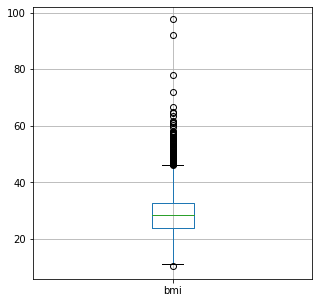

In [16]:
#BMI FEATURE:
df.boxplot(column='bmi')

<AxesSubplot:>

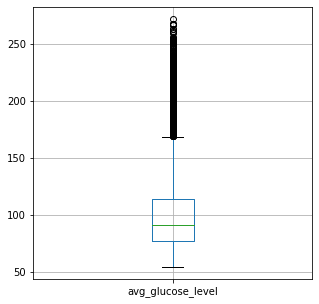

In [17]:
#AVG_GLUCOSE_LEVEL:
df.boxplot(column='avg_glucose_level')

## NO NEED TO WORRY ABOUT THESE OUTLIERS. THESE WILL BE HANDLED AUTOMATICALLY BY THE MODEL WE'LL BE USING i.e., XGBOOST.

---

## 3. HANDLE THE CATEGORICAL VARIABLES USING LABEL ENCODER

In [18]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [19]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [20]:
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df['work_type']=work_type

In [21]:
df[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


#### THE CATEGORICAL FEATURES ARE HANDLED.

-------

## 4. REVOME UNNECESSARY COLUMNS IF ANY

In [23]:
#ID COLUMN IS NOT REQUIRED.
df = df.drop('id', axis=1)

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


----

## SPLIT THE DATASET INTO X & Y

In [25]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3577, 10)
Number transactions y_train dataset:  (3577,)
Number transactions X_test dataset:  (1533, 10)
Number transactions y_test dataset:  (1533,)


-----

## 5. HANDLING IMBALANCED DATA

* WE WILL BE USING SMOTE TECHNIQUE TO HANDLE THE IMBALANCED DATA.

In [27]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 173
Before OverSampling, counts of label '0': 3404 

After OverSampling, the shape of train_X: (6808, 10)
After OverSampling, the shape of train_y: (6808,) 

After OverSampling, counts of label '1': 3404
After OverSampling, counts of label '0': 3404


## THE DATA IS NOW BALANCED !!!!!!!!!

-----------

## 6. MODEL BUILDING USING THE PRE-PROCESSED / BALANCED DATASET.

In [28]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

In [29]:
import numpy as np
rdf_model = RandomForestClassifier()
rdf_model.fit(X_train_res, y_train_res)
print('Training Score: {}'.format(rdf_model.score(X_train_res, y_train_res)))
print('Test Score: {}'.format(rdf_model.score(X_test, y_test)))

Training Score: 1.0
Test Score: 0.9021526418786693


In [30]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_res, y_train_res)
print('Training Score: {}'.format(xgb_model.score(X_train_res, y_train_res)))

print('Test Score: {}'.format(xgb_model.score(X_test, y_test)))

[04:43:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training Score: 0.9972091656874266
Test Score: 0.9191128506196999


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


## HERE, WE HAVE TRAINED TWO MODELS - RANDOM FOREST & XGBOOST. IT GAVE US VERY GOOD RESULT WITH OUT ANY HYPER-PARAMETERE TUNING.

-----

## CONCLUSION

-----

### THIS IS HOW YOU HAVE TO APPROACH A MACHINE LEARNING REGRESSION OR CLASSIFICATION PROBLEM. EACH THING SHOULD BE FOLLOWED STEP-WISE.

* ## BEFORE STARTING TO CODE - FIRST UNDERSTAND THE PROBLEM, THEN MAKE A MIND MAP OF HOW TO START AND APPROACH THIS.

----

### I HOPE THIS HELPS YOU TO START YOUR JOURNEY IN THIS FIELD.

### IF YOU LIKE THIS, PLEASE GIVE ME AN UPVOTE.